# Fasion-MNIST classification 

In this Assignment you are going to classify a fashion dataset.

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

![](https://www.tensorflow.org/static/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png)


In [3]:
# Imad Hanzaz, Yannick Urselmann, Jaylong Verschuren

# Initialization

load all needed libraries and functions, 
check the previos tutorial how to correctly load keras and other modules

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
physical_devices = tf.config.list_physical_devices('GPU')
#details = tf.config.experimental.get_device_details(physical_devices[0])

print("Num GPUs:", len(physical_devices))
#print("GPU Type:", details["device_name"])
#print("Compute Capability:", details["compute_capability"])

Num GPUs: 1


# Load dataset & Plot a subset

load your dataset and show a plot of the subset of your data

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train.shape, y_train.shape , x_test.shape , y_test.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
classes = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

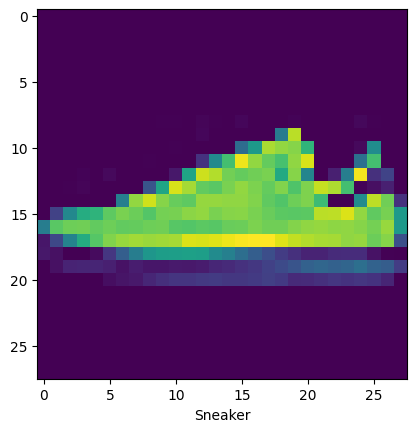

In [8]:
plt.imshow(x_train[6])
plt.xlabel(classes[y_train[6]])
plt.show()

# Prepare Data

pre-process your raw input data... rescale... normalize....

In [9]:
x_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

In [10]:
x_train = x_train / 255
x_test = x_test / 255
x_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.08627451,
        0.34509804, 0.7372549 , 0.6745098 , 0.51764706, 0.49019608,
        0.55294118, 0.78039216, 0.56078431, 0.03529412, 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.07843137, 0.51372549, 0.78039216, 0.80784314,
        0.76862745, 0.79215686, 0.94901961, 1.        , 1.        ,
        0.98039216, 0.87058824, 0.77254902, 0.80784314, 0.7372549 ,
        0.49411765, 0.06666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.1372549 , 0.83921569, 0.74901961, 0.71764706, 0.69803922,
        0.68627451, 0.65882353, 0.58823529, 0.63529412, 0.62352941,
        0.59607843, 0.6196

## Define your Model

Define your neural network architecture here

* Describe the implemented network architecture.
* How many parameters does this network have, and where in the network are these located?

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the Model

Fitting the model is the time consuming part, this depend on the complexity of the model and the amount of training data.
In the fitting process the model is first build up in memory with all the tunable parameters and intercomnnects (with random start values). This is also the limitation of some systems, all these parameters are stored in memory (or when not fitting in a swap file)

**TIP:** do not start the first time with training a lot of epochs, first see if this and all following steps in your system work and when you are sure that all works train your final model. You can also monitor the Jetson CPU/GPU/Memory performance during this process (see Tips & Tricks)

* Explain what hyperparameters are available and what they do.
* Which hyperparameter result in better training results?

In [13]:
history = model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5005 - accuracy: 0.8238
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3765 - accuracy: 0.8639
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3377 - accuracy: 0.8773


# Evaluate Model

Show the model accuracy after the training process ...
* What is the final accuracy of the trained Network?

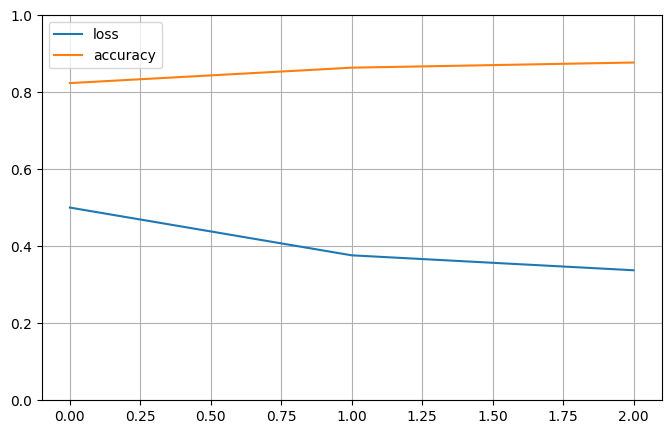

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f"Validated loss: {val_loss} , Validated Accuracy: {val_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3677 - accuracy: 0.8669
Validated loss: 0.36768683791160583 , Validated Accuracy: 0.8669000267982483


# Save model

Save the model for later usage

In [16]:
model.save('Ass2PartAModel')

INFO:tensorflow:Assets written to: Ass2PartAModel\assets


# Evaluate Final Model

After training and saving the model you can deploy this model on any given input image. You can start a new application in where you import this model and apply it on any given imput images, so you can just load the model and don't need the timeconsuming training anymore.

In [17]:
test_model = tf.keras.models.load_model('Ass2PartAModel')

In [18]:
prediction = test_model.predict([x_test])

313/313 [==============================] - 0s 820us/step


In [19]:
import numpy as np

print(np.argmax(prediction[4]))

6


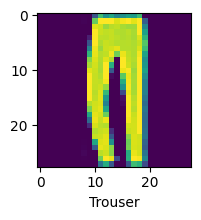

In [20]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()
    
plot_sample(x_test, y_test, 2)

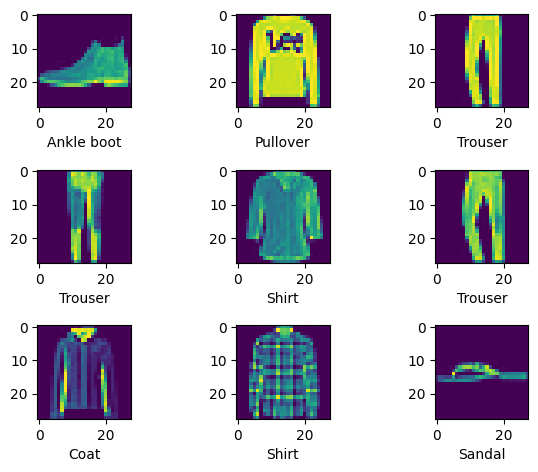

In [21]:
for i in range(9):
# define subplot
    plt.subplot(330 + 1 + i)
    plt.tight_layout(pad=1.0)
# plot raw pixel data
    plt.imshow(x_test[i])
# show the figure
    plt.xlabel(classes[y_test[i]])
plt.show()

## Make Prediction

We can use our saved model to make a prediction on new images that are not trained on... make sure the input images receive the same pre-processing as the images you trained on.

So fetch some images from the internet (similar classes, but not from your dataset), prepare them to fit your network and classify them. Do this for  **10 images per class** and show the results!

* How good is the detection on you real dataset? (show some statistics) 

In [22]:
import zipfile
with zipfile.ZipFile('./datasetTest.zip', 'r') as zip_ref:
    zip_ref.extractall('./testset')

In [23]:
import pathlib
data_dir = pathlib.Path('./testset')
amountOfJPG = len(list(data_dir.glob('*/*.jpg')))
amountOfPNG = len(list(data_dir.glob('*/*.png')))
image_count = amountOfJPG + amountOfPNG

print('There are ' + str(image_count) + ' images in the custom dataset.')

There are 100 images in the custom dataset.


In [66]:
test_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory='./testset', target_size=(28,28), classes=['Ankle boot', 'Bag', 'Coat', 'Dress', 'Pullover', 'Sandal', 'Shirt', 'Sneaker', 'T-shirt & Top', 'Trouser'], batch_size=100, shuffle=False)

Found 100 images belonging to 10 classes.


In [67]:
images, labels = next(test_batches)

In [68]:
grayscaleImages = tf.image.rgb_to_grayscale(images)
grayscaleImages = grayscaleImages / 255.0

In [79]:
def plotImages(images_arr):
    fig, axes = plt.subplots(10, 10, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

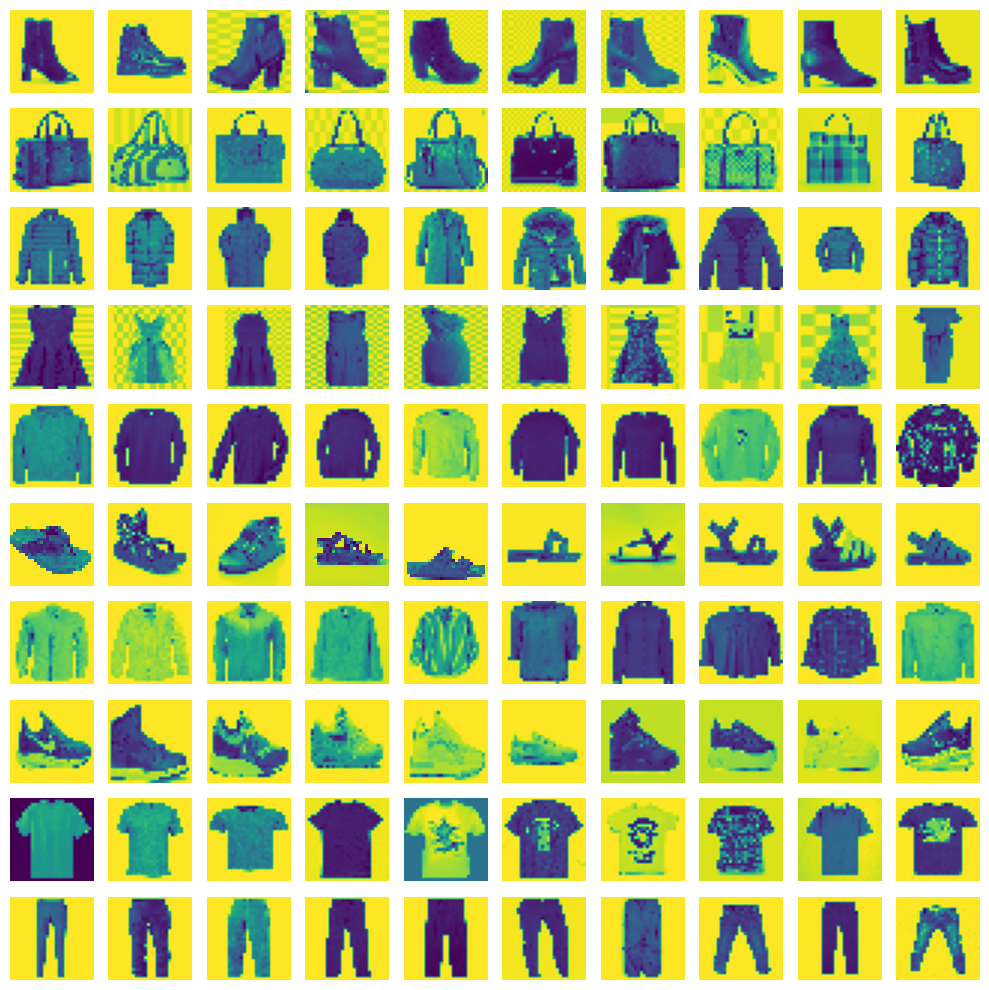

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [80]:
plotImages(grayscaleImages)
print(labels)

In [96]:
def one_hot_decode(encoded_seq):
    return [np.argmax(vector) for vector in encoded_seq]

4/4 [==============================] - 0s 1ms/step
This image most likely belongs to Ankle boot with a 77.97 percent confidence.


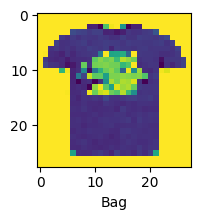

In [99]:

index = 89

predictions = model.predict(grayscaleImages)
score = tf.nn.softmax(predictions[index])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score)], 100 * np.max(score))
)

plot_sample(grayscaleImages, one_hot_decode(labels), index)

## Additional Questions
* In which way could the network accuracy be improved further (only explanation, no implementation)?